# Data Understanding - Features Description and Statistics

## Tasks: 
1) feature description and statistics !! (All together)
2) visualization xx
3) outliers (detection) xx
4) missing values (detection) !! 
5) correlation analysis !!
6) duplicates rows/columns !!


In [1]:
#importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#loading the dataset
df = pd.read_csv("../dataset/cmi_internet.csv")

#check this line of code, it works for my personal directory but maybe not for yours and probably there is a way to generalize it, but I do not remember. 

In [5]:
#dimension of the dataset
print("The dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

The dataset has 8460 rows and 82 columns.


In [6]:
#printing the first 5 rows of the dataset
df.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,0,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,1,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,2,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,3,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,4,Spring,18,1,Summer,65.0,NaN,17.937682,NaN,77.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,1.0,0.0


In [7]:
#type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8460 entries, 0 to 8459
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      8460 non-null   int64  
 1   Basic_Demos-Enroll_Season               8460 non-null   object 
 2   Basic_Demos-Age                         8460 non-null   int64  
 3   Basic_Demos-Sex                         8460 non-null   int64  
 4   CGAS-Season                             7158 non-null   object 
 5   CGAS-CGAS_Score                         7034 non-null   float64
 6   Physical-Season                         7858 non-null   object 
 7   Physical-BMI                            7591 non-null   float64
 8   Physical-Height                         7595 non-null   float64
 9   Physical-Weight                         7641 non-null   float64
 10  Physical-Waist_Circumference            5624 non-null   floa

In [11]:
#separating the numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=[object]).columns.tolist()
print("Numerical features: ", numerical_features)
print("Categorical features: ", categorical_features)
print("Length of numerical features", len(numerical_features))
print("Length of categorical features", len(categorical_features))

Numerical features:  ['id', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_

In [13]:
#basic statistics of the numerical features
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
id,8460.0,4229.500000,2442.335972,0.0,2114.750000,4229.500000,6344.250000,8459.000000
Basic_Demos-Age,8460.0,10.240189,3.574680,5.0,7.000000,10.000000,12.000000,22.000000
Basic_Demos-Sex,8460.0,0.402364,0.490404,0.0,0.000000,0.000000,1.000000,1.000000
CGAS-CGAS_Score,7034.0,67.021041,35.284140,25.0,60.500000,65.000000,70.500000,999.000000
Physical-BMI,7591.0,19.532651,4.683925,0.0,16.541742,17.937682,21.469546,59.132048
...,...,...,...,...,...,...,...,...
PCIAT-PCIAT_Total,2714.0,27.855195,20.318784,0.0,12.000000,26.000000,41.000000,93.000000
SDS-SDS_Total_Raw,4903.0,41.410667,9.464932,17.0,35.000000,39.500000,45.000000,96.000000
SDS-SDS_Total_T,4903.0,58.072813,12.563287,38.0,50.000000,55.000000,62.500000,100.000000
PreInt_EduHx-computerinternet_hoursday,7849.0,0.981144,1.046645,0.0,0.000000,1.000000,2.000000,3.000000


In [15]:
#adding skeweness measures
num_summary = df[numerical_features].describe().T
num_summary["skewness"] = df[numerical_features].skew()
num_summary

,count,mean,std,min,25%,50%,75%,max,skewness
id,8460.0,4229.500000,2442.335972,0.0,2114.750000,4229.500000,6344.250000,8459.000000,0.000000
Basic_Demos-Age,8460.0,10.240189,3.574680,5.0,7.000000,10.000000,12.000000,22.000000,0.687795
Basic_Demos-Sex,8460.0,0.402364,0.490404,0.0,0.000000,0.000000,1.000000,1.000000,0.398280
CGAS-CGAS_Score,7034.0,67.021041,35.284140,25.0,60.500000,65.000000,70.500000,999.000000,20.213708
Physical-BMI,7591.0,19.532651,4.683925,0.0,16.541742,17.937682,21.469546,59.132048,1.780910
...,...,...,...,...,...,...,...,...,...
PCIAT-PCIAT_Total,2714.0,27.855195,20.318784,0.0,12.000000,26.000000,41.000000,93.000000,0.546694
SDS-SDS_Total_Raw,4903.0,41.410667,9.464932,17.0,35.000000,39.500000,45.000000,96.000000,1.274480
SDS-SDS_Total_T,4903.0,58.072813,12.563287,38.0,50.000000,55.000000,62.500000,100.000000,1.285401
PreInt_EduHx-computerinternet_hoursday,7849.0,0.981144,1.046645,0.0,0.000000,1.000000,2.000000,3.000000,0.531171


In [16]:
#printing the columns with skweness greater than 1 or less than -1
skewed_columns = num_summary[(num_summary["skewness"] > 1) | (num_summary["skewness"] < -1)].index.tolist()
print("Skewed columns: ", skewed_columns)

Skewed columns:  ['CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage', 'FGC-FGC_CU', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_TL_Zone', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'sii']


In [17]:
#printing super skewed columns with skewness greater than 2 or less than -2
super_skewed_columns = num_summary[(num_summary["skewness"] > 2) | (num_summary["skewness"] < -2)].index.tolist()
print("Super skewed columns: ", super_skewed_columns)

Super skewed columns:  ['CGAS-CGAS_Score', 'Fitness_Endurance-Max_Stage', 'FGC-FGC_CU', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_PU', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_12']


In [21]:
#printing extremely skewed columns with skewness greater than 20 or less than -20
extremely_skewed_columns = num_summary[(num_summary["skewness"] > 20) | (num_summary["skewness"] < -20)].index.tolist()
print("Extremely skewed columns: ", extremely_skewed_columns)

Extremely skewed columns:  ['CGAS-CGAS_Score', 'BIA-BIA_BMC', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW']


In [23]:
#printing the skeweness values of the extremely skewed columns in a table with the column name and the skeweness value
skewness_table = num_summary.loc[extremely_skewed_columns, ["skewness"]]
print("Skeweness values of the extremely skewed columns:")
print(skewness_table)

Skeweness values of the extremely skewed columns:
                  skewness
CGAS-CGAS_Score  20.213708
BIA-BIA_BMC      38.061643
BIA-BIA_BMR      35.555544
BIA-BIA_DEE      34.233995
BIA-BIA_ECW      28.292666
BIA-BIA_FFM      23.986623
BIA-BIA_FFMI     20.862584
BIA-BIA_Fat     -34.131865
BIA-BIA_ICW      31.925619
BIA-BIA_LDM      24.192084
BIA-BIA_LST      28.253749
BIA-BIA_SMM      28.733359
BIA-BIA_TBW      31.085953


In [24]:
#checking for columns with zero variance
zero_variance_columns = num_summary[num_summary["std"] == 0].index.tolist()
print("Columns with zero variance: ", zero_variance_columns)

Columns with zero variance:  []


In [37]:
#checkinf for the 10 columns with the lowest variance and creating a table with their names and their variance values
low_variance_columns = num_summary.sort_values(by="std").head(10).index.tolist()
low_variance_table = num_summary.loc[low_variance_columns, ["std"]]
print("10 columns with the lowest variance:")
print(low_variance_table)


10 columns with the lowest variance:
                        std
PAQ_A-PAQ_A_Total  0.361204
FGC-FGC_TL_Zone    0.368332
FGC-FGC_GSD_Zone   0.392075
FGC-FGC_GSND_Zone  0.399669
FGC-FGC_PU_Zone    0.418339
FGC-FGC_SRL_Zone   0.450198
FGC-FGC_SRR_Zone   0.463425
FGC-FGC_CU_Zone    0.488983
Basic_Demos-Sex    0.490404
PCIAT-PCIAT_12     0.519074


In [38]:
#checking for constant columns
constant_columns = num_summary[num_summary["std"] == 0].index.tolist()
print("Constant columns: ", constant_columns)

Constant columns:  []


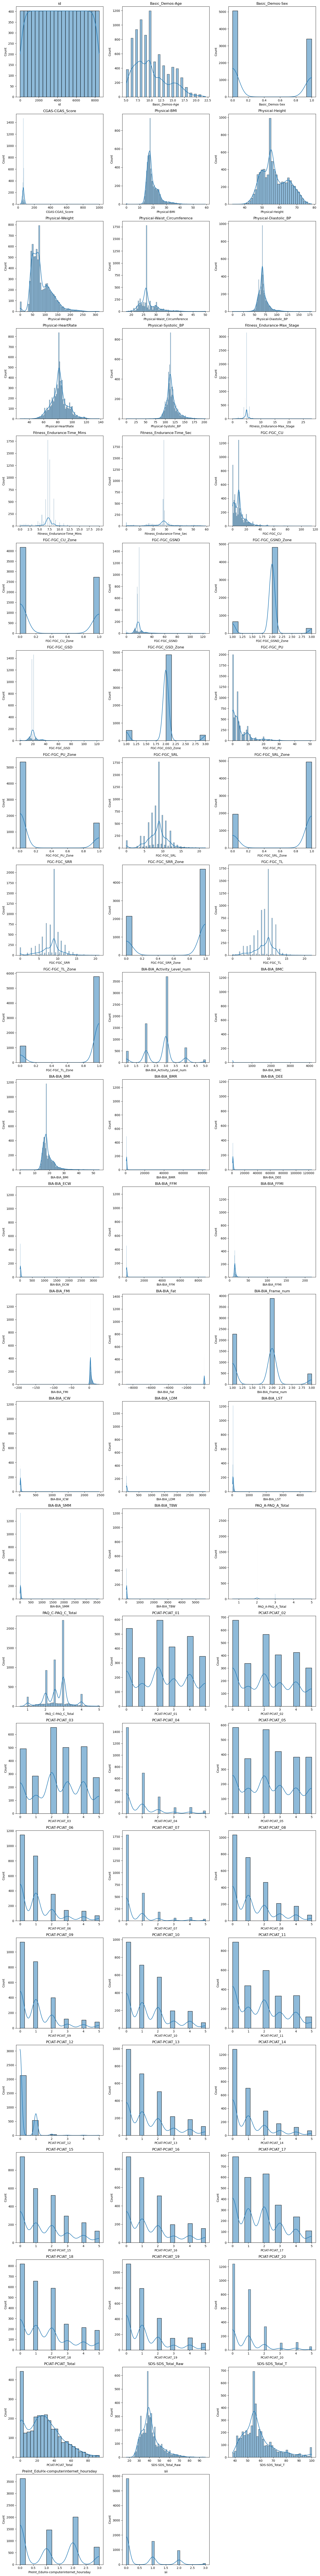

In [30]:
#creating histograms of the numerical variables, putting all of them in a matrix, so that they are condensed
num_cols = len(numerical_features)
num_rows = (num_cols // 3) + 1
plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

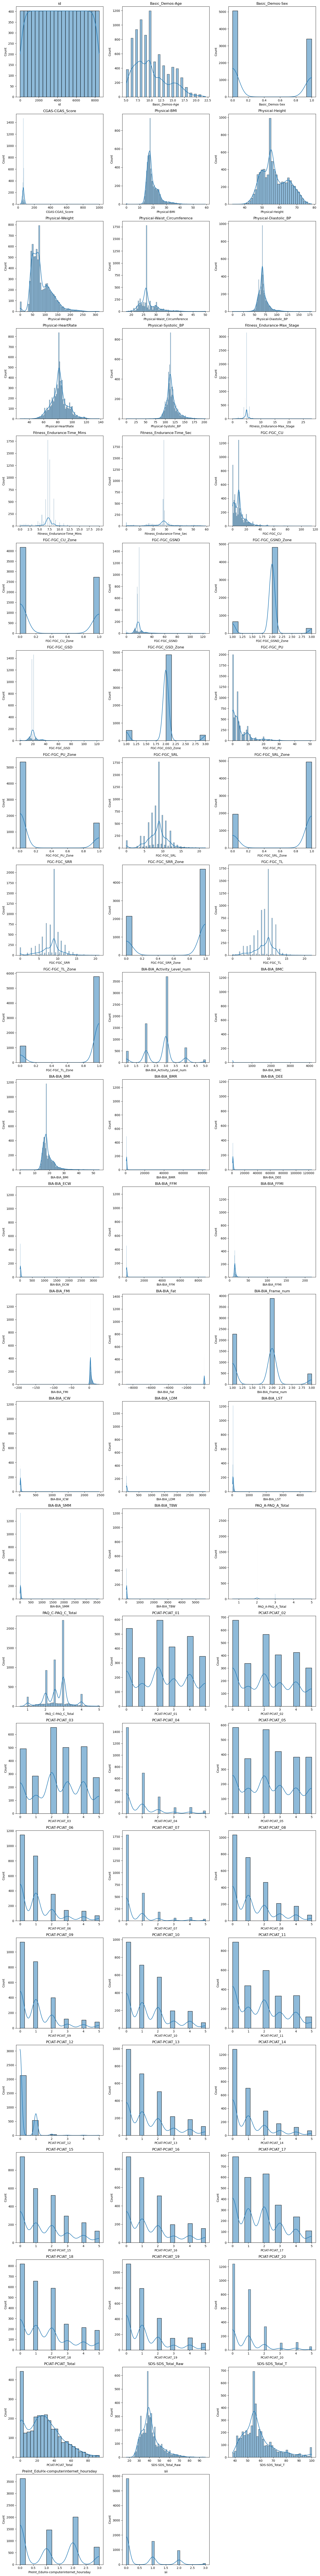

In [31]:
#creating histograms as before but trying natural binning, so that the bins are more meaningful and not just 30 as default
num_cols = len(numerical_features)
num_rows = (num_cols // 3) + 1
plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(df[col], kde=True, bins='auto')  # Using 'auto' for natural binning
    plt.title(col)
plt.tight_layout()
plt.show()

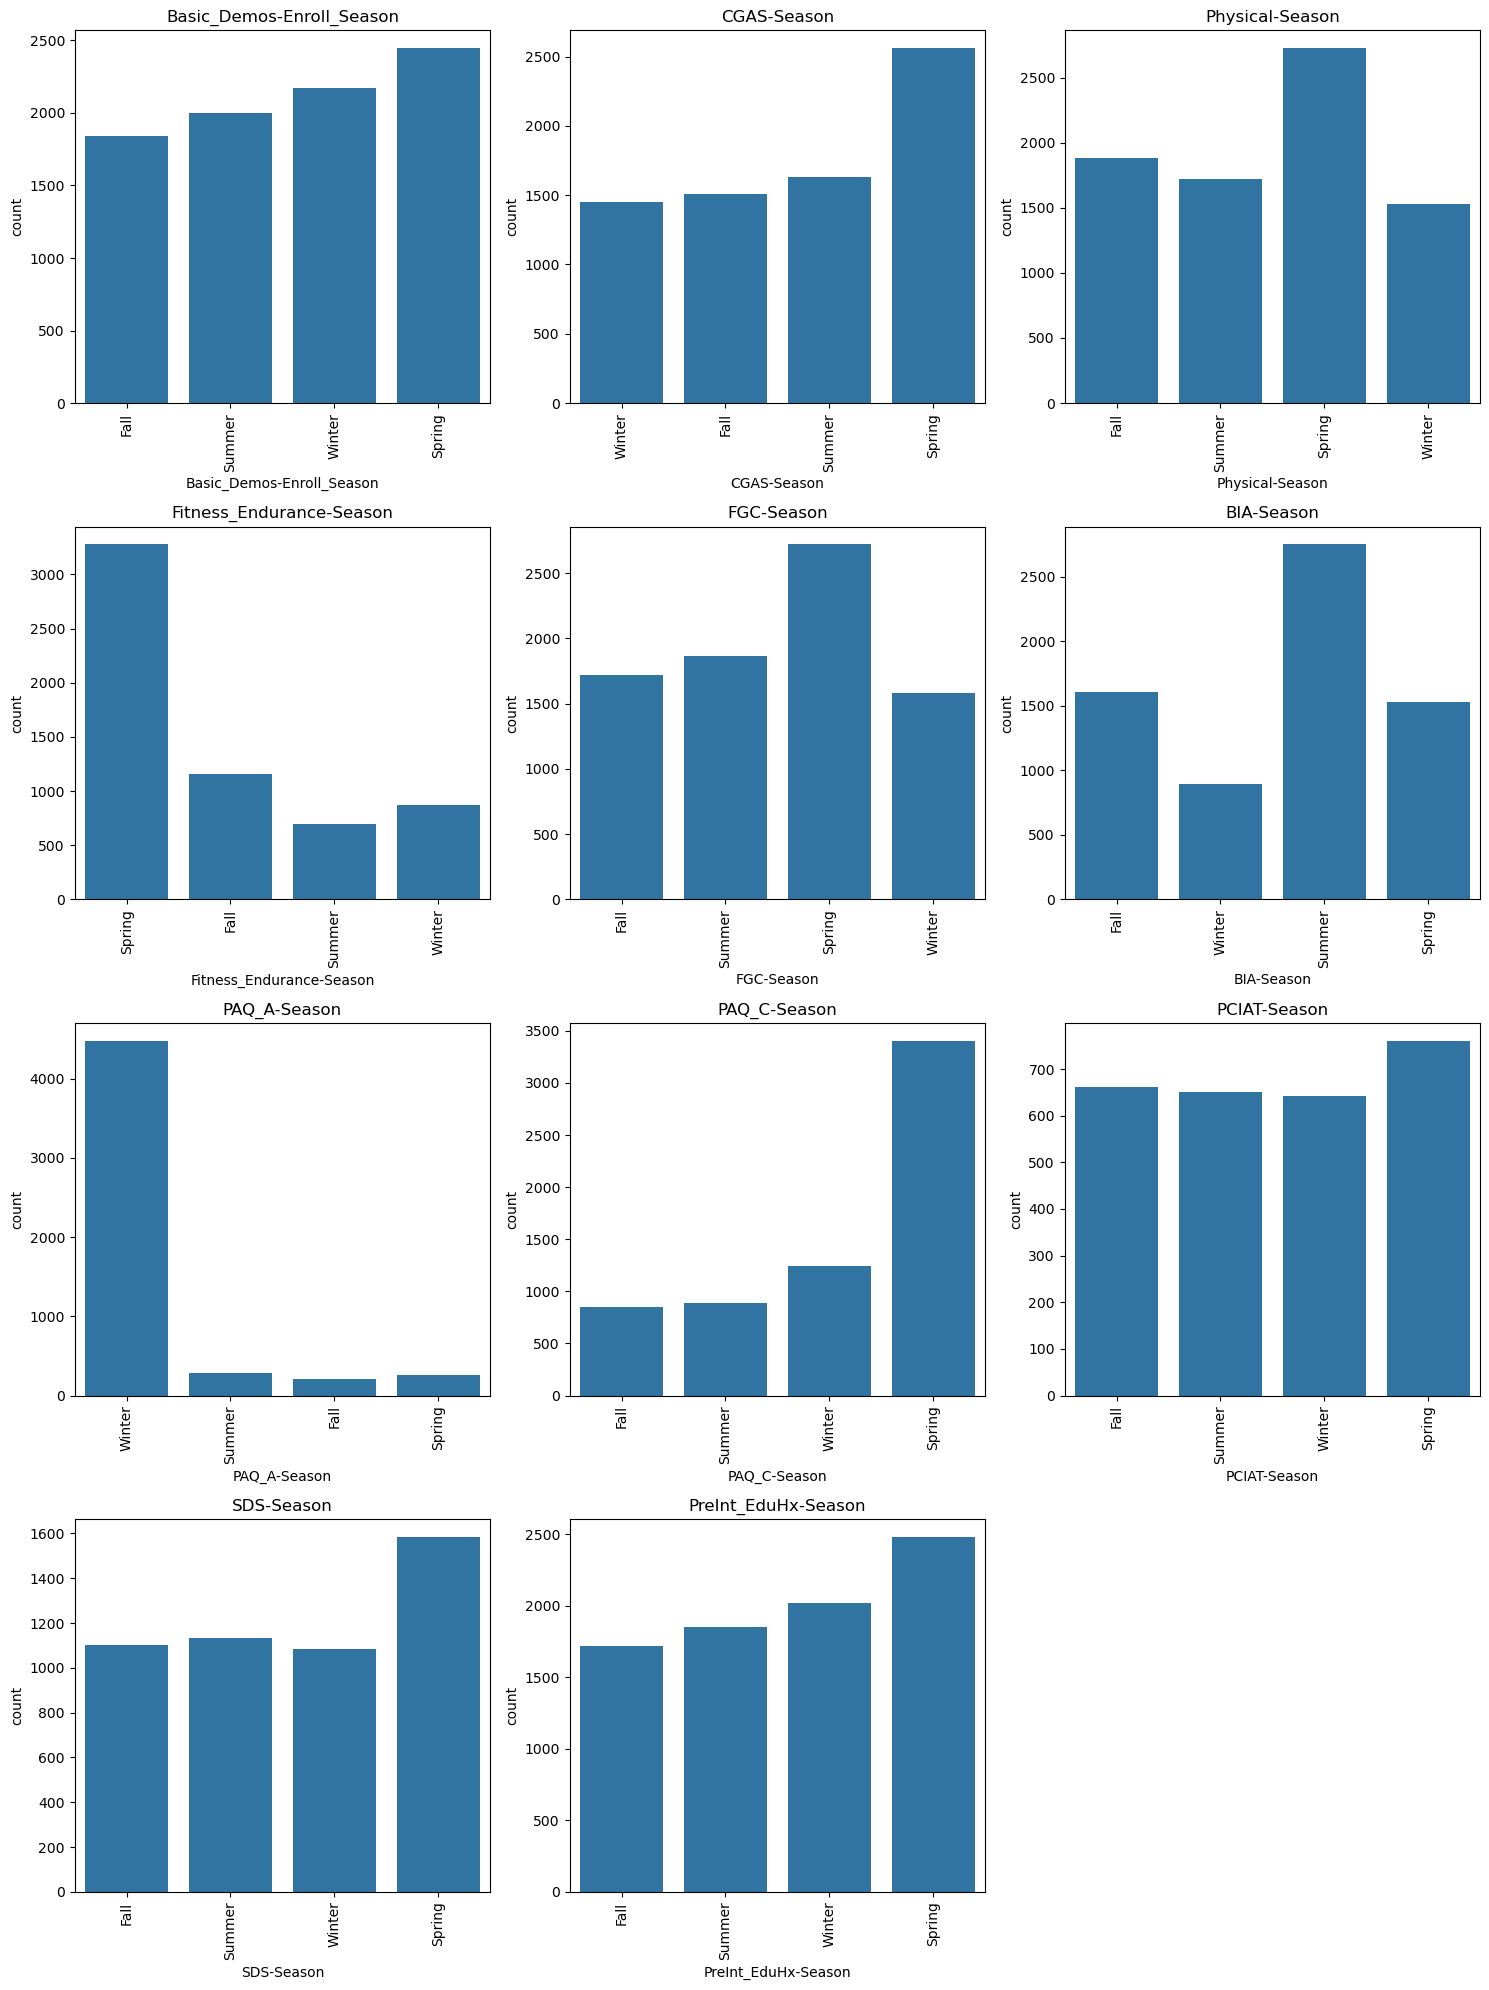

In [32]:
#creating bar plots for categorical variables
num_cols = len(categorical_features)
num_rows = (num_cols // 3) + 1
plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(categorical_features):
    plt.subplot(num_rows, 3, i + 1)
    sns.countplot(x=df[col])
    plt.title(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [36]:
#analysis of duplicated data
duplicated_rows = df[df.duplicated()]
print("Number of duplicated rows: ", duplicated_rows.shape[0])

Number of duplicated rows:  0


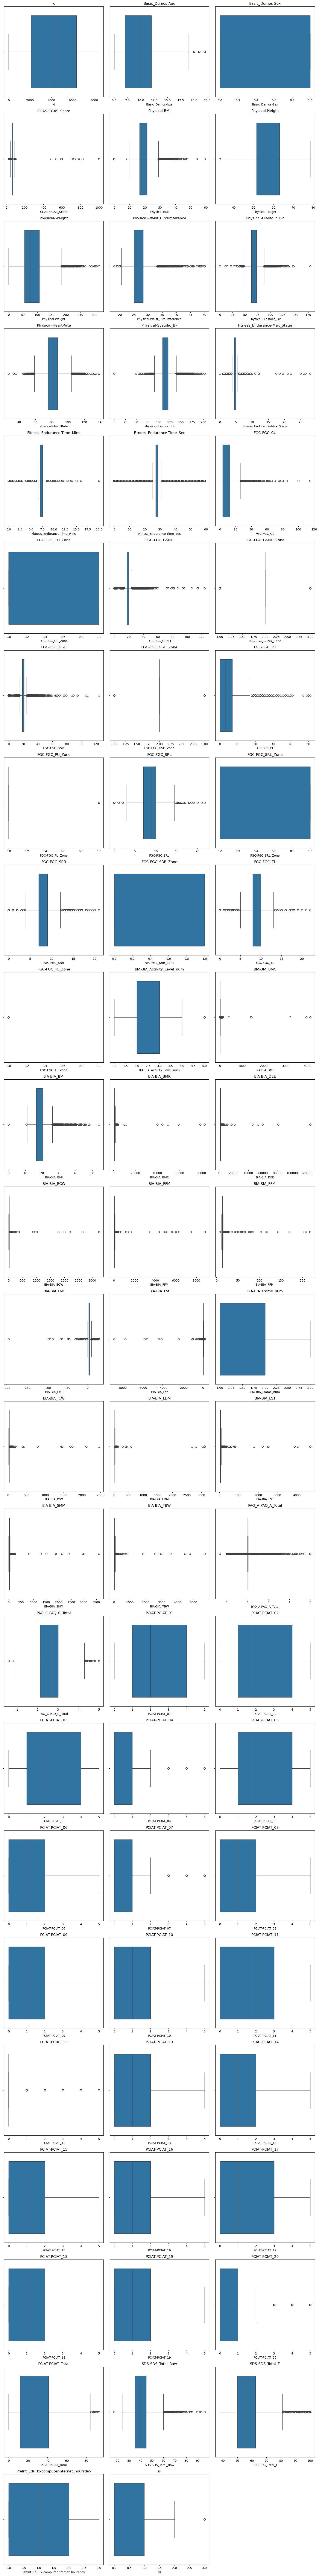

In [39]:
#creating box plots for numerical variables to understand the distributions
num_cols = len(numerical_features)
num_rows = (num_cols // 3) + 1
plt.figure(figsize=(15, num_rows * 5))
for i, col in enumerate(numerical_features):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()